In [12]:
import pandas as pd
import yaml
grn_models = ['collectri', 'granie', 'celloracle', 'figr', 'scglue', 'scenicplus', 'positive_control']

def headmap(scores, name=''):
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn
    fig, ax = plt.subplots(1, 1, figsize=(4, 4), sharey=True)
    vmin = np.nanmin(scores)
    vmax = np.nanmax(scores)

    seaborn.heatmap(scores, ax=ax, square=False, cbar=False, annot=True, fmt='.2f', vmin=vmin, vmax=vmax)
    # Remove only the ticks, keep labels
    ax.tick_params(left=False, bottom=False)
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=0)
    ax.set_title(name, pad=10)


    plt.tight_layout()

In [13]:

# Load the YAML file and create matrix scores 
result_file = '../resources/results/subsample_200_ridge/scores.yaml'
with open(result_file, 'r') as file:
    data = yaml.safe_load(file)

# Initialize a dictionary to hold DataFrames for each method_id
dfs = {}

# Process each entry in the YAML file
for entry in data:
    method_id = entry['method_id']
    dataset_id = entry['dataset_id']
    
    # If the method_id is not yet in the dictionary, initialize an empty DataFrame
    if method_id not in dfs:
        dfs[method_id] = pd.DataFrame()
    
    # Create a dictionary with metric_ids as keys and metric_values as values
    metrics_dict = dict(zip(entry['metric_ids'], entry['metric_values']))
    
    # Convert the dictionary to a DataFrame with dataset_id as the index
    df_entry = pd.DataFrame(metrics_dict, index=[dataset_id])
    
    # Append the entry to the corresponding DataFrame
    dfs[method_id] = pd.concat([dfs[method_id], df_entry])


In [17]:
dfs.keys()

dict_keys(['reg1-positive_control', 'reg1-celloracle', 'reg1-scenicplus', 'reg1-granie', 'reg1-scglue', 'reg1-figr'])

In [16]:
df_grn_list = []
for name in grn_models:
    df_grn = pd.concat([dfs.get(f'reg1-{name}'), dfs.get(f'reg2-{name}')], axis=1)
    df_grn_list.append(df_grn)
df_grn.columns

AttributeError: 'NoneType' object has no attribute 'columns'

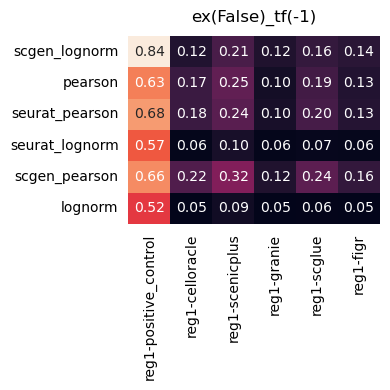

In [10]:
col = 'ex(False)_tf(-1)'
scores = pd.DataFrame()
for name, df in dfs.items():
    scores[name] = df[col]
headmap(scores, name=col)

In [11]:
pd.read_csv('../resources/results/celloracle_test/trace.txt', sep='\t')

,task_id,hash,native_id,name,status,exit,submit,duration,realtime,%cpu,peak_rss,peak_vmem,rchar,wchar
0,1,d9/37475e,632268be-47c1-4428-b8f6-7db9f614a18c,run_grn_inference:run_wf:celloracle:processWf:...,COMPLETED,0,2024-08-11 19:45:58.615,19m 27s,12m 45s,122.8%,3.9 GB,27.4 GB,15.1 GB,11.2 GB
1,2,4d/33d91d,73a9e0a9-2bd5-4c71-9a1c-050d92885448,run_grn_inference:publishStatesSimpleWf:publis...,COMPLETED,0,2024-08-11 20:05:26.439,19.1s,0ms,94.7%,0,0,75.8 KB,42.2 KB
